In [83]:
import pandas as pd
from itertools import combinations
import torch
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt

In [84]:
outfit = pd.read_csv('./datathon/dataset/outfit_preprocessed.csv')
product = pd.read_csv('./datathon/dataset/product_preprocessed.csv')


In [85]:
outfit

,cod_outfit,cod_modelo_color
0,1,51000622-02
1,1,43067759-01
2,1,53060518-02
3,1,53030594-08
4,1,43077762-01
...,...,...
42820,7109,57074411-92
42821,5448,57047880-OR
42822,5448,57057881-69
42823,7373,57089203-99


In [86]:

# Agrupar por outfit y encontrar todos los pares de productos dentro de cada outfit
pairs = outfit.groupby('cod_outfit')['cod_modelo_color'].apply(lambda x: list(combinations(sorted(x), 2)))

# Ahora tienes una serie de listas de pares, aplanar esta estructura en una lista de pares
flat_pairs = [pair for sublist in pairs for pair in sublist]

# Convertir la lista de pares en un DataFrame y contar la frecuencia de cada par
pair_df = pd.DataFrame(flat_pairs, columns=['producto1', 'producto2'])
edges_with_weights = pair_df.groupby(['producto1', 'producto2']).size().reset_index(name='weight')

edges_with_weights

,producto1,producto2,weight
0,37000577-10,47004377-01,1
1,37000577-10,47032878-99,1
2,37000577-10,47087124-DC,1
3,37000577-10,57003777-02,1
4,37000577-10,57004052-PL,1
...,...,...,...
70254,67070592-08,67090516-99,1
70255,67071502-TM,67080595-30,1
70256,67071502-TM,67090611-30,1
70257,67080516-17,67090509-09,1


In [87]:
from torch_geometric.data import Data
import torch

# Asumir que 'id_producto' es la columna que relaciona ambos datasets
# Crear un mapeo de id_producto a índice en el tensor de características
product_to_index = {id_producto: idx for idx, id_producto in enumerate(product['cod_modelo_color'].unique())}

# Convertir las aristas a índices
edges_index = torch.tensor([(product_to_index[id1], product_to_index[id2]) for id1, id2 in edges_with_weights[['producto1', 'producto2']].values], dtype=torch.long).t().contiguous()

# Convertir los pesos a un tensor
edges_weight = torch.tensor(edges_with_weights['weight'].values, dtype=torch.float)

product.drop(columns = ['cod_modelo_color', 'des_filename'], inplace = True)
# Crear características de nodos (puede necesitar más procesamiento dependiendo de la naturaleza de las características)
# Aquí asumimos que todas las características son numéricas y no requieren codificación adicional
node_features = torch.tensor(product.iloc[:, 1:].values, dtype=torch.float)

# Crear el objeto Data
data = Data(x=node_features, edge_index=edges_index, edge_attr=edges_weight)


In [88]:
index_to_product = {idx: product_id for product_id, idx in product_to_index.items()}


In [89]:
data

Data(x=[8943, 14], edge_index=[2, 70259], edge_attr=[70259])

C:\Users\sergi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch: 1, Loss: 2794.731201171875, Val AUC: 0.6817635005618349
Epoch: 2, Loss: 2126.0791015625, Val AUC: 0.7027120100469297
Epoch: 3, Loss: 1622.5499267578125, Val AUC: 0.7105578689933241
Epoch: 4, Loss: 1230.079345703125, Val AUC: 0.718582854121224
Epoch: 5, Loss: 950.540283203125, Val AUC: 0.7247167691189107
Epoch: 6, Loss: 717.8775634765625, Val AUC: 0.7249534007535197
Epoch: 7, Loss: 529.885498046875, Val AUC: 0.7264663890541344
Epoch: 8, Loss: 395.87286376953125, Val AUC: 0.7283072245356601
Epoch: 9, Loss: 284.7532958984375, Val AUC: 0.7226730120959746
Epoch: 10, Loss: 200.85946655273438, Val AUC: 0.7282279066693106
Epoch: 11, Loss: 142.74661254882812, Val AUC: 0.7390818956970058
Epoch: 12, Loss: 104.80596923828125, Val AUC: 0.735335448476436
Epoch: 13, Loss: 79.98882293701172, Val AUC: 0.7358953004164188
Epoch: 14, Loss: 73.10191345214844, Val AUC: 0.7323821799193602
Epoch: 15, Loss: 71.21853637695312, Val AUC: 0.7313695551589663
Epoch: 16, Loss: 70.3758544921875, Val AUC: 0.7306

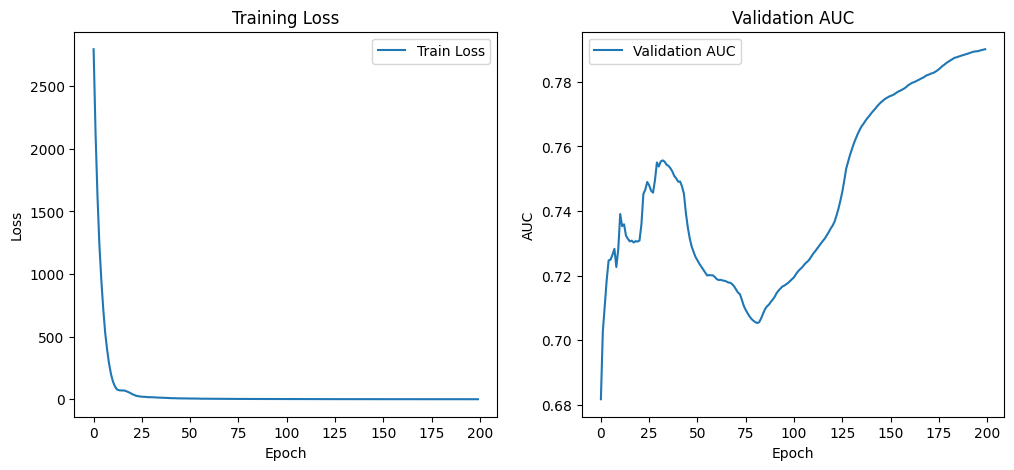

Test AUC: 0.7269402306827947
ID 1: 57003820-TN, ID 2: 57056013-92, Score: 2.0415
ID 1: 53015029-TM, ID 2: 53095035-CG, Score: 2.1417
ID 1: 53023028-99, ID 2: 53023714-06, Score: 1.4237
ID 1: 53033776-OR, ID 2: 57055943-99, Score: 2.6363
ID 1: 57014778-99, ID 2: 57053809-08, Score: 2.1455
ID 1: 57050271-OR, ID 2: 57084007-99, Score: 11.0902
ID 1: 53003751-99, ID 2: 53081158-OR, Score: 7.1449
ID 1: 57007749-17, ID 2: 57095981-56, Score: 70.0997
ID 1: 53020604-02, ID 2: 53050681-OR, Score: 0.7380
ID 1: 57040253-99, ID 2: 57052525-PL, Score: 0.8304
ID 1: 53003752-99, ID 2: 57064001-37, Score: 2.8893
ID 1: 53010967-82, ID 2: 53080883-81, Score: 0.6032
ID 1: 57032881-84, ID 2: 57062508-08, Score: 11.7279
ID 1: 43015788-OR, ID 2: 53060511-08, Score: 166.9197
ID 1: 53095742-92, ID 2: 53191158-46, Score: 1.3824
ID 1: 53003799-02, ID 2: 53045770-02, Score: 2.1128
ID 1: 57040318-20, ID 2: 57093253-01, Score: 107.2804
ID 1: 53005774-99, ID 2: 53095770-52, Score: 3.5696
ID 1: 51080925-15, ID 2: 530

In [92]:
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling
from sklearn.metrics import roc_auc_score
from torch_geometric.utils import train_test_split_edges

# Usamos la función train_test_split_edges de PyTorch Geometric que simplifica este proceso
data = train_test_split_edges(data)

# Suponiendo que ya tienes el objeto 'data' con las características de los nodos y las aristas

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(data.num_node_features, 16)
        self.conv2 = GCNConv(16, 16)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

# Inicializar el modelo y el optimizador
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Función para calcular la puntuación de la arista
def get_link_score(edge_index, node_embeddings):
    # Calcula las incrustaciones de los nodos de inicio y fin para cada arista
    start_embeddings = node_embeddings[edge_index[0]]
    end_embeddings = node_embeddings[edge_index[1]]

    # Usa el producto escalar de las incrustaciones como la puntuación de la arista
    scores = torch.sum(start_embeddings * end_embeddings, dim=1)
    return scores

# Función de entrenamiento
def train():
    model.train()
    optimizer.zero_grad()
    
 # Asegúrate de que edge_index es un tensor entero de forma [2, num_edges]
    edge_index = data.train_pos_edge_index
    if edge_index.size(0) != 2:
        edge_index = edge_index.t().contiguous()
    edge_index = edge_index.to(torch.long)

    data.edge_index = edge_index
    node_embeddings = model(data.x, data.edge_index)

    # Obtener las puntuaciones de las aristas positivas (reales)
    pos_edge_scores = get_link_score(data.edge_index, node_embeddings)

    # Muestreo de aristas negativas (no existen en el grafo)
    neg_edge_index = negative_sampling(edge_index=data.edge_index, num_nodes=data.num_nodes, num_neg_samples=data.edge_index.size(1))
    neg_edge_scores = get_link_score(neg_edge_index, node_embeddings)

    # Calcular la función de pérdida
    loss = torch.nn.functional.binary_cross_entropy_with_logits(torch.cat([pos_edge_scores, neg_edge_scores]), torch.cat([torch.ones(pos_edge_scores.size(0)), torch.zeros(neg_edge_scores.size(0))]))

    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    with torch.no_grad():
        # Calcular incrustaciones de nodos
        node_embeddings = model(data.x, data.train_pos_edge_index)

        # Predecir aristas positivas y negativas en el conjunto de prueba
        pos_edge_scores = get_link_score(data.test_pos_edge_index, node_embeddings)
        neg_edge_scores = get_link_score(data.test_neg_edge_index, node_embeddings)

        # Calcular las etiquetas verdaderas y las puntuaciones
        true_labels = torch.cat([torch.ones(data.test_pos_edge_index.size(1)), torch.zeros(data.test_neg_edge_index.size(1))])
        pred_scores = torch.cat([pos_edge_scores, neg_edge_scores])

        # Calcular la puntuación AUC
        auc_score = roc_auc_score(true_labels.cpu(), pred_scores.cpu())
        return auc_score


train_losses = []
val_aucs = []

# Función de validación
def validate():
    model.eval()
    with torch.no_grad():
        node_embeddings = model(data.x, data.val_pos_edge_index)
        pos_edge_scores = get_link_score(data.val_pos_edge_index, node_embeddings)
        neg_edge_scores = get_link_score(data.val_neg_edge_index, node_embeddings)
        
        true_labels = torch.cat([torch.ones(data.val_pos_edge_index.size(1)), torch.zeros(data.val_neg_edge_index.size(1))])
        pred_scores = torch.cat([pos_edge_scores, neg_edge_scores])
        
        auc_score = roc_auc_score(true_labels.cpu(), pred_scores.cpu())
        return auc_score
    

# Modificar el bucle de entrenamiento para incluir validación
for epoch in range(200):
    loss = train()
    train_losses.append(loss.item())
    
    val_auc = validate()
    val_aucs.append(val_auc)
    
    print(f'Epoch: {epoch+1}, Loss: {loss.item()}, Val AUC: {val_auc}')

# Graficar las curvas de pérdida y AUC
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_aucs, label='Validation AUC')
plt.title('Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.show()

# Evaluar el modelo en el conjunto de prueba
test_auc = test()
print(f'Test AUC: {test_auc}')

threshold = 0.5

# Para obtener las aristas predichas, puedes aplicar un umbral a las puntuaciones
# Aquí, simplemente imprimimos las puntuaciones sin aplicar un umbral
model.eval()
with torch.no_grad():
    node_embeddings = model(data.x, torch.cat([data.test_pos_edge_index, data.test_neg_edge_index], dim=-1))
    pos_edge_scores = get_link_score(data.test_pos_edge_index, node_embeddings)
    neg_edge_scores = get_link_score(data.test_neg_edge_index, node_embeddings)
    all_scores = torch.cat([pos_edge_scores, neg_edge_scores], dim=0)

# Obtener los índices de las aristas predichas con puntuaciones por encima del umbral
predicted_edge_indices = (all_scores > threshold).nonzero(as_tuple=True)[0]
predicted_edges = torch.cat([data.test_pos_edge_index, data.test_neg_edge_index], dim=-1)[:, predicted_edge_indices]
predicted_scores = all_scores[predicted_edge_indices]

# Mapear los índices de los nodos a identificadores de productos y obtener las puntuaciones correspondientes
predicted_edges_ids_scores = [(index_to_product[predicted_edges[0, i].item()], index_to_product[predicted_edges[1, i].item()], predicted_scores[i].item()) for i in range(predicted_edges.size(1))]

# Imprimir las aristas predichas con identificadores de productos y puntuaciones
for edge1, edge2, score in predicted_edges_ids_scores:
    print(f"ID 1: {edge1}, ID 2: {edge2}, Score: {score:.4f}")

In [ ]:
# Graficar las curvas de pérdida y AUC
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_aucs, label='Validation AUC')
plt.title('Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.show()

# Evaluar el modelo en el conjunto de prueba
test_auc = test()
print(f'Test AUC: {test_auc}')

threshold = 0.5

# Para obtener las aristas predichas, puedes aplicar un umbral a las puntuaciones
# Aquí, simplemente imprimimos las puntuaciones sin aplicar un umbral
model.eval()
with torch.no_grad():
    node_embeddings = model(data.x, torch.cat([data.test_pos_edge_index, data.test_neg_edge_index], dim=-1))
    pos_edge_scores = get_link_score(data.test_pos_edge_index, node_embeddings)
    neg_edge_scores = get_link_score(data.test_neg_edge_index, node_embeddings)
    all_scores = torch.cat([pos_edge_scores, neg_edge_scores], dim=0)

# Obtener los índices de las aristas predichas con puntuaciones por encima del umbral
predicted_edge_indices = (all_scores > threshold).nonzero(as_tuple=True)[0]
predicted_edges = torch.cat([data.test_pos_edge_index, data.test_neg_edge_index], dim=-1)[:, predicted_edge_indices]
predicted_scores = all_scores[predicted_edge_indices]

# Mapear los índices de los nodos a identificadores de productos y obtener las puntuaciones correspondientes
predicted_edges_ids_scores = [(index_to_product[predicted_edges[0, i].item()], index_to_product[predicted_edges[1, i].item()], predicted_scores[i].item()) for i in range(predicted_edges.size(1))]

# Imprimir las aristas predichas con identificadores de productos y puntuaciones
for edge1, edge2, score in predicted_edges_ids_scores:
    print(f"ID 1: {edge1}, ID 2: {edge2}, Score: {score:.4f}")

In [75]:
predicted_edges_ids = [(index_to_product[start_idx.item()], index_to_product[end_idx.item()]) for start_idx, end_idx in predicted_edges.t()]

# Imprimir las aristas predichas con identificadores de productos
for edge in predicted_edges_ids:
    print(edge)

('53083025-02', '53093739-99')
('47017851-01', '47094760-PL')
('53033761-99', '57008635-19')
('57004061-PL', '57004792-26')
('57050111-PL', '57050254-99')
('41095829-02', '43090723-OR')
('53045024-37', '57064001-37')
('57022526-PL', '57093809-99')
('53033776-OR', '57005506-80')
('57006014-PL', '57067758-08')
('53033786-99', '53103803-OR')
('53030871-05', '53060511-08')
('57050294-OR', '57072894-02')
('57005813-94', '57066000-09')
('57027883-OR', '57047881-OR')
('51093784-20', '57055921-02')
('53033776-OR', '57075924-89')
('47067136-08', '57040077-02')
('53033761-99', '53060821-TN')
('51080613-01', '53040593-08')
('53050831-OR', '53090872-20')
('57004787-07', '57040161-TC')
('51060677-08', '53090827-OR')
('57014432-01', '57093804-02')
('53020885-05', '57058262-08')
('53020583-92', '57022501-32')
('47075864-32', '57050080-52')
('57088265-08', '57096020-99')
('57014425-PL', '57047755-85')
('47061313-TO', '47094424-99')
('57040376-OR', '57084034-99')
('53070830-OR', '53090547-TO')
('570477

In [79]:
index_to_product

{0: '41085800-02',
 1: '53000586-TO',
 2: '53030601-81',
 3: '53050730-15',
 4: '53070773-70',
 5: '53003736-94',
 6: '53045718-17',
 7: '53050926-37',
 8: '53085736-96',
 9: '53015770-02',
 10: '57007891-05',
 11: '57064001-02',
 12: '57067700-74',
 13: '47086303-08',
 14: '57040032-32',
 15: '57040164-99',
 16: '57020260-83',
 17: '57050281-TM',
 18: '57062516-99',
 19: '57012888-12',
 20: '57084018-99',
 21: '57085800-01',
 22: '57004787-07',
 23: '57083821-99',
 24: '57049096-65',
 25: '57099098-05',
 26: '57067753-TO',
 27: '57079104-37',
 28: '57057741-30',
 29: '43031153-99',
 30: '53070567-02',
 31: '53060575-52',
 32: '53050579-99',
 33: '53030593-52',
 34: '53030547-05',
 35: '51030638-45',
 36: '53040741-56',
 37: '53073709-99',
 38: '53080599-37',
 39: '53003725-99',
 40: '53053040-99',
 41: '53090974-02',
 42: '53060987-02',
 43: '53063750-01',
 44: '53063755-TU',
 45: '53015744-09',
 46: '51015740-02',
 47: '53085778-99',
 48: '53005773-96',
 49: '57097878-43',
 50: '5701